In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


Loading defective images: Dimensions resized to 200px200p
Images loaded: 5419 Status: MISSING IMAGES
Amount of Images missing: -5319
----------------------------------------------------------------------------------
Loading defectless images: Dimensions resized to 200px200p
Images loaded: 5671 Status: MISSING IMAGES
Amount of Images missing: -5571
----------------------------------------------------------------------------------
Loading samples of processed and classified images by their respective label:


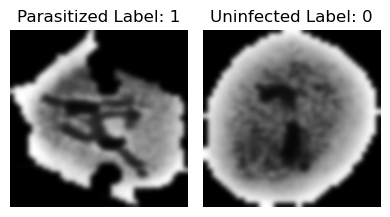

In [2]:
Parasitized_folder = '/Users/dylankennedy/Documents/ITMLA3/Datasets/cell_images/Parasitized'
Uninfected_folder = '/Users/dylankennedy/Documents/ITMLA3/Datasets/cell_images/Uninfected'

def canny_feature_extraction(image, threshold1=100, threshold2=200):
    #Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=threshold1, threshold2=threshold2)
    #Flatten the edge image to obtain a feature cevtor
    feature_vector = edges.flatten()

    return feature_vector

def hog_feature_extraction(image):
    #Initialize HOG descriptor
    hog = cv2.HOGDescriptor()
    #Compute HOF features
    hog_features = hog.compute(image)
    #Flatten the feature vector
    feature_vector = hog_features.flatten()

    return feature_vector
    
def lbp_feature_extraction(image, radius=1, n_points=8):
    # Compute LBP features
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    
    # Flatten the LBP image to obtain a feature vector
    feature_vector = lbp.ravel()
    
    return feature_vector

#Image enhancement functions:

def bilateral_filter(image, d, sigma_color, sigma_space):
    filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
    return filtered_image
 
def median_blur(image, kernel_size):
    blurred_image = cv2.medianBlur(image, kernel_size)
    return blurred_image
 
def mean_blur(image, kernel_size):
    blurred_image = cv2.blur(image, (kernel_size, kernel_size))
    return blurred_image

#Here we do contrast stretching of the image
def contrast_stretching(image):
    # Calculate minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)
    # Perform contrast stretching
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255
    stretched_image = stretched_image.astype(np.uint8)
    return stretched_image

def image_enhancement(image):
    
    #Equalizing image data
    image_eq = cv2.equalizeHist(image)
   
    image_blur_Gauss = cv2.GaussianBlur(image_eq, (15, 15), 0)

       
    return image_blur_Gauss

def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    features = []
    c = 0
    num_img_in_file = 100 
    
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        c += 1
        if img is not None:
            resized_img = cv2.resize(img, (200, 200))
            enh_img = image_enhancement(resized_img)
            fet_vec = canny_feature_extraction(enh_img)
            images.append(enh_img)
            labels.append(label)
            features.append(fet_vec)
    #Used to check if all the images loaded successfully and alerts if file sizes are not even        
    if c == num_img_in_file: 
        print(f"Images loaded: {c} Status: ALL IMAGES LOADED SUCCESSFULLY")
    else:
        print(f"Images loaded: {c} Status: MISSING IMAGES")
        print(f"Amount of Images missing: {num_img_in_file-c}")
        
    return images, labels, features

#Loading the images using the load_and_preprocess_images function
print("Loading defective images: Dimensions resized to 200px200p")
Parasitized_images, Parasitized_labels, Parasitized_features = load_and_preprocess_images(Parasitized_folder, 1)

print("----------------------------------------------------------------------------------")
print("Loading defectless images: Dimensions resized to 200px200p")
Uninfected_images, Uninfected_labels, Uninfected_features = load_and_preprocess_images(Uninfected_folder, 0)


#Displaying the images using the display_sidebyside function
def display_sidebyside(Parasitized_no, Uninfected_number):
    #Assign images
    Uninfected_img = Uninfected_images[Uninfected_number]
    Parasitized_img = Parasitized_images[Parasitized_no]
 
    #Assign labels
    Uninfected_label = Uninfected_labels[Uninfected_number]
    Parasitized_label = Parasitized_labels[Parasitized_no]
    # Create a figure and axis objects
    fig, axes = plt.subplots(1, 2, figsize=(4, 4))
    
    #Display the first image with its label
    axes[0].imshow(Parasitized_img, cmap='gray')
    axes[0].set_title(f"Parasitized Label: {Parasitized_label}")
    axes[0].axis('off')
 
    #Display the second image with its label
    axes[1].imshow(Uninfected_img, cmap='gray')
    axes[1].set_title(f"Uninfected Label: {Uninfected_label}" )
    axes[1].axis('off')
 
    #Adjust layout and display the images
    plt.tight_layout()
    plt.show()

#Displaying processed sample images taken from the defective_folder and the defectless_folder variables created earlier
print("----------------------------------------------------------------------------------")
print("Loading samples of processed and classified images by their respective label:")
img_num = 0
display_sidebyside(img_num,img_num)

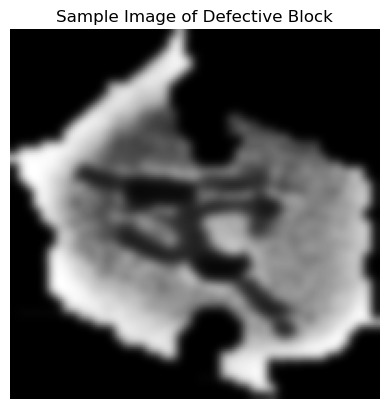

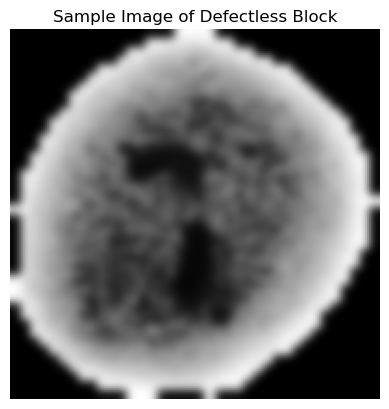

In [3]:
#Show sample image of defective block

img_num = 0
plt.imshow(Parasitized_images[img_num], cmap='gray')
plt.title('Sample Image of Defective Block')
plt.axis('off')
plt.grid(False)
plt.show()

#Show sample image of defectless block
img_num = 0
plt.imshow(Uninfected_images[img_num], cmap='gray')
plt.title('Sample Image of Defectless Block')
plt.axis('off')
plt.grid(False)
plt.show()

----------------------------------------------------------------------------------
Loading samples of classified images by their respective label:


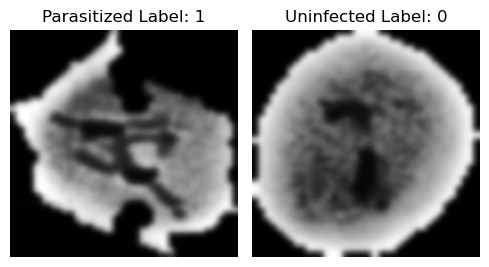

In [4]:
def display_sidebyside(Parasitized_no, Uninfected_number):
    #assign images
    Uninfected_img = Uninfected_images[Uninfected_number]
    Parasitized_img = Parasitized_images[Parasitized_no]
 
    #Assign labels
    Uninfected_label = Uninfected_labels[Uninfected_number]
    Parasitized_label = Parasitized_labels[Parasitized_no]
    # Create a figure and axis objects
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))
    
    # Display the first image with its label
    axes[0].imshow(Parasitized_img, cmap='gray')
    axes[0].set_title(f"Parasitized Label: {Parasitized_label}")
    axes[0].axis('off')
 
    # Display the second image with its label
    axes[1].imshow(Uninfected_img, cmap='gray')
    axes[1].set_title(f"Uninfected Label: {Uninfected_label}" )
    axes[1].axis('off')
 
    # Adjust layout and display the images
    plt.tight_layout()
    plt.show()
print("----------------------------------------------------------------------------------")
print("Loading samples of classified images by their respective label:")
img_num = 0
display_sidebyside(img_num,img_num)

In [5]:
X = np.array(Parasitized_features + Uninfected_features)
y = Parasitized_labels + Uninfected_labels

#Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

print("----------------------------------------------------------------------------------")
print("Scaled features matrix")
print(X_scaled.shape)
print("----------------------------------------------------------------------------------")

----------------------------------------------------------------------------------
Scaled features matrix
(11088, 40000)
----------------------------------------------------------------------------------


In [6]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Calculate metrics
accuracy_mlp = accuracy_score(y_test, y_pred) 
precision_mlp = precision_score(y_test, y_pred, average='weighted')
recall_mlp = recall_score(y_test, y_pred, average='weighted')
f1_mlp = f1_score(y_test, y_pred, average='weighted')

print("----------------------------------------------------------------------------------")
print("MLPClassifier Metrics:")
print(f"Accuracy: {accuracy_mlp*100} %")
print(f"Precision: {precision_mlp*100:.2f} %")
print(f"Recall: {recall_mlp*100:.2f} %")
print(f"F1 Score: {f1_mlp*100:.2f} %" )
print("----------------------------------------------------------------------------------")

----------------------------------------------------------------------------------
MLPClassifier Metrics:
Accuracy: 76.51036970243462 %
Precision: 76.68 %
Recall: 76.51 %
F1 Score: 76.44 %
----------------------------------------------------------------------------------


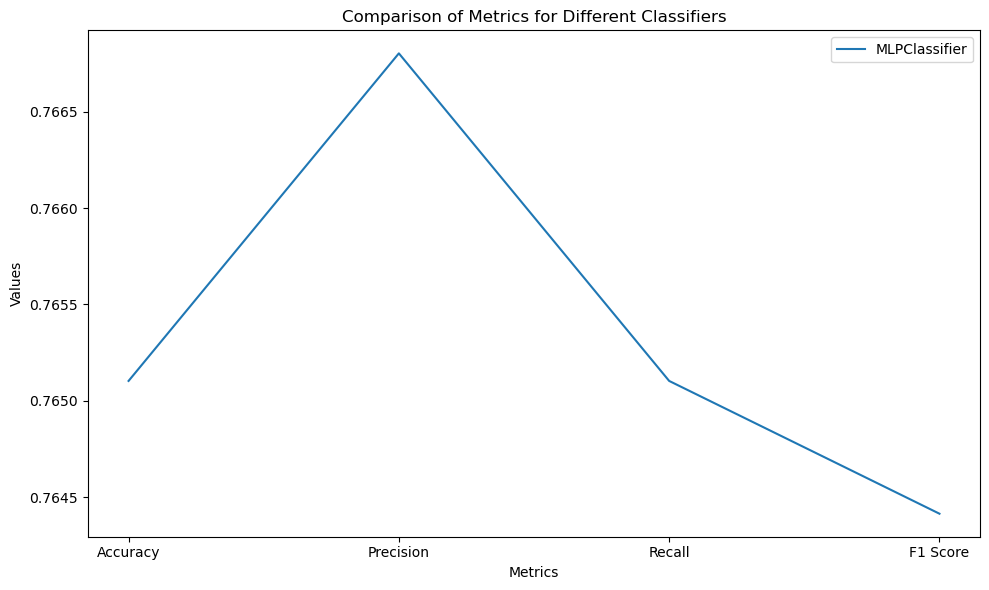

In [9]:
import matplotlib.pyplot as plt

classifiers = ['MLPClassifier', 'SVM Classifier']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

mlp_metrics = [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp]

metrics_values = [mlp_metrics]

x = range(len(metrics))

plt.figure(figsize=(10, 6))

plt.plot(metrics_values[0], label='MLPClassifier')  # Plotting metrics for MLPClassifier
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics for Different Classifiers')
plt.xticks(x, metrics)  # Set the X-axis labels without adjusting positions
plt.legend()
plt.tight_layout()

plt.show()

